In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
model = Sequential()
model.add(layers.Conv2D(8,(5,5),activation= 'relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(layers.Conv2D(16,(5,5),activation= 'relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation= 'relu'))
model.add(layers.Dense(84, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 120)              

In [ ]:

model = Sequential()
model.add(layers.Conv2D(8, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(16, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 8)         608       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        3216      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 120)              

##Using Dataset of diabetes2.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv('diabetes2.0.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

##Split features and target variable

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

##Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Building the ANN

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))  # Adding Dropout
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))  # Adding Dropout
model.add(Dense(units=1, activation='sigmoid'))

##Compiling the ANN

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


##Parameter Tuning using Early Stopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


##Training the ANN

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 0.6719 - accuracy: 0.5927 - val_loss: 0.6134 - val_accuracy: 0.6748
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.7352 - val_loss: 0.5738 - val_accuracy: 0.6992
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5296 - accuracy: 0.7413 - val_loss: 0.5359 - val_accuracy: 0.7398
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4906 - accuracy: 0.7800 - val_loss: 0.5032 - val_accuracy: 0.7398
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4816 - accuracy: 0.7862 - val_loss: 0.4861 - val_accuracy: 0.7642
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.7719 - val_loss: 0.4743 - val_accuracy: 0.7724
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4623 - accuracy: 0.7800 - val_loss: 0.4699 - val_accuracy: 0.7642
Epoch 8/100


## Evaluate the model

In [ ]:
_, train_accuracy = model.evaluate(X_train, y_train)
_, test_accuracy = model.evaluate(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

5/5 [==============================] - 0s 6ms/step - loss: 0.5444 - accuracy: 0.7403
Training Accuracy: 0.79
Test Accuracy: 0.74


## Graph

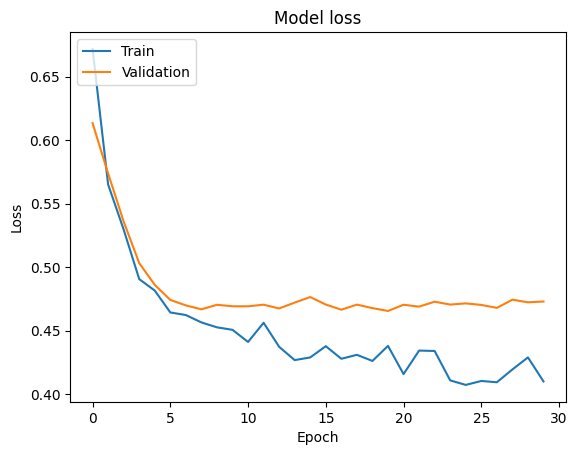

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
